# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [16]:
# Let's get started importing the necessary libraries
import pandas as pd
# %matplotlib notebook
import matplotlib.pyplot as plt


In [17]:
# Loading the data
df = pd.read_csv('ames_train.csv')

In [18]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<IPython.core.display.Javascript object>


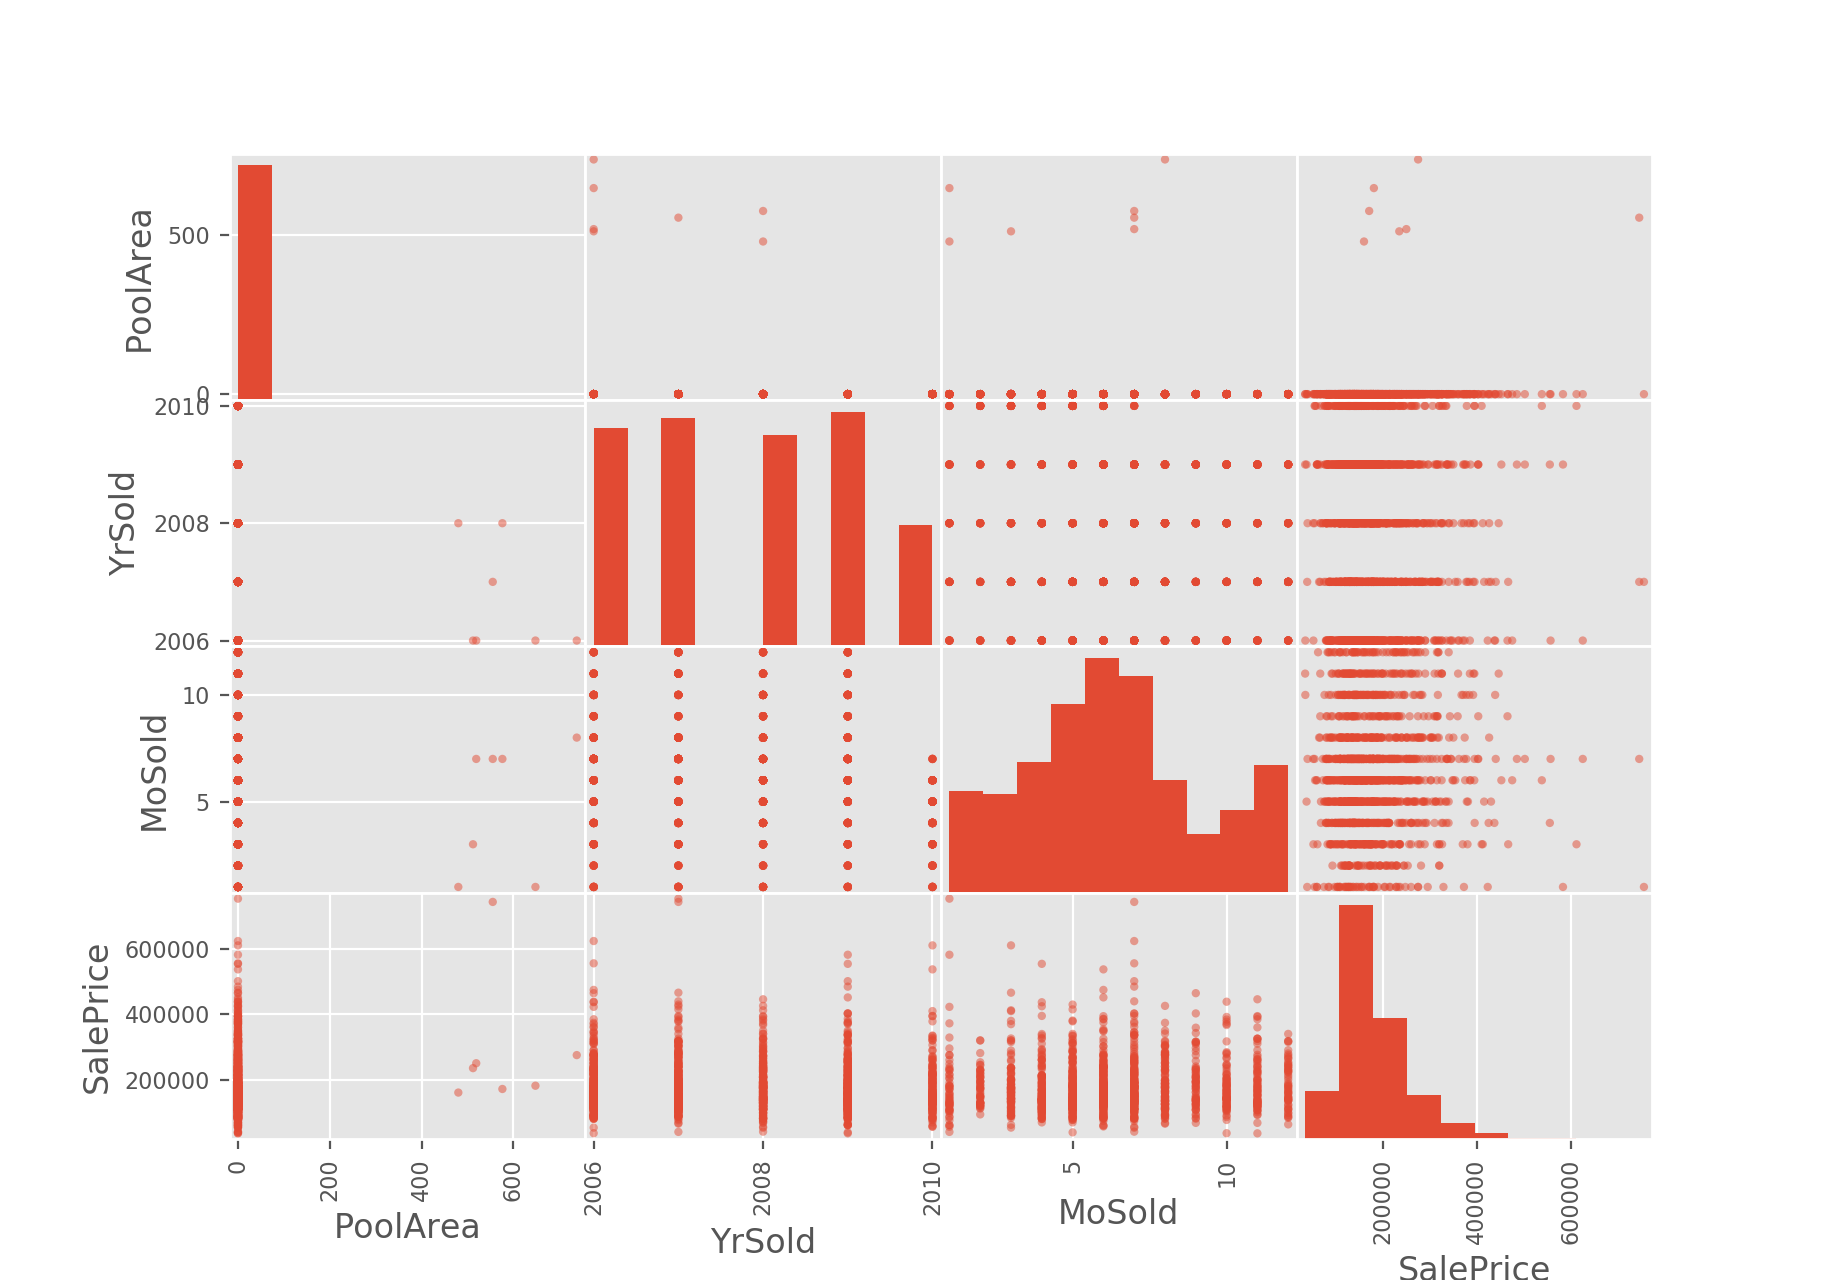

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122a032e8>,
      dtype=object)

In [19]:
# Investigating Distributions using scatter_matrix
# plt.style.available
# pd.plotting.scatter_matrix(df.loc[])
sample_df = df[['Functional', 'KitchenQual', 'PoolArea', 'YrSold', 'MoSold', 'SalePrice']]
plt.style.use('ggplot')
pd.plotting.scatter_matrix(sample_df)

<IPython.core.display.Javascript object>


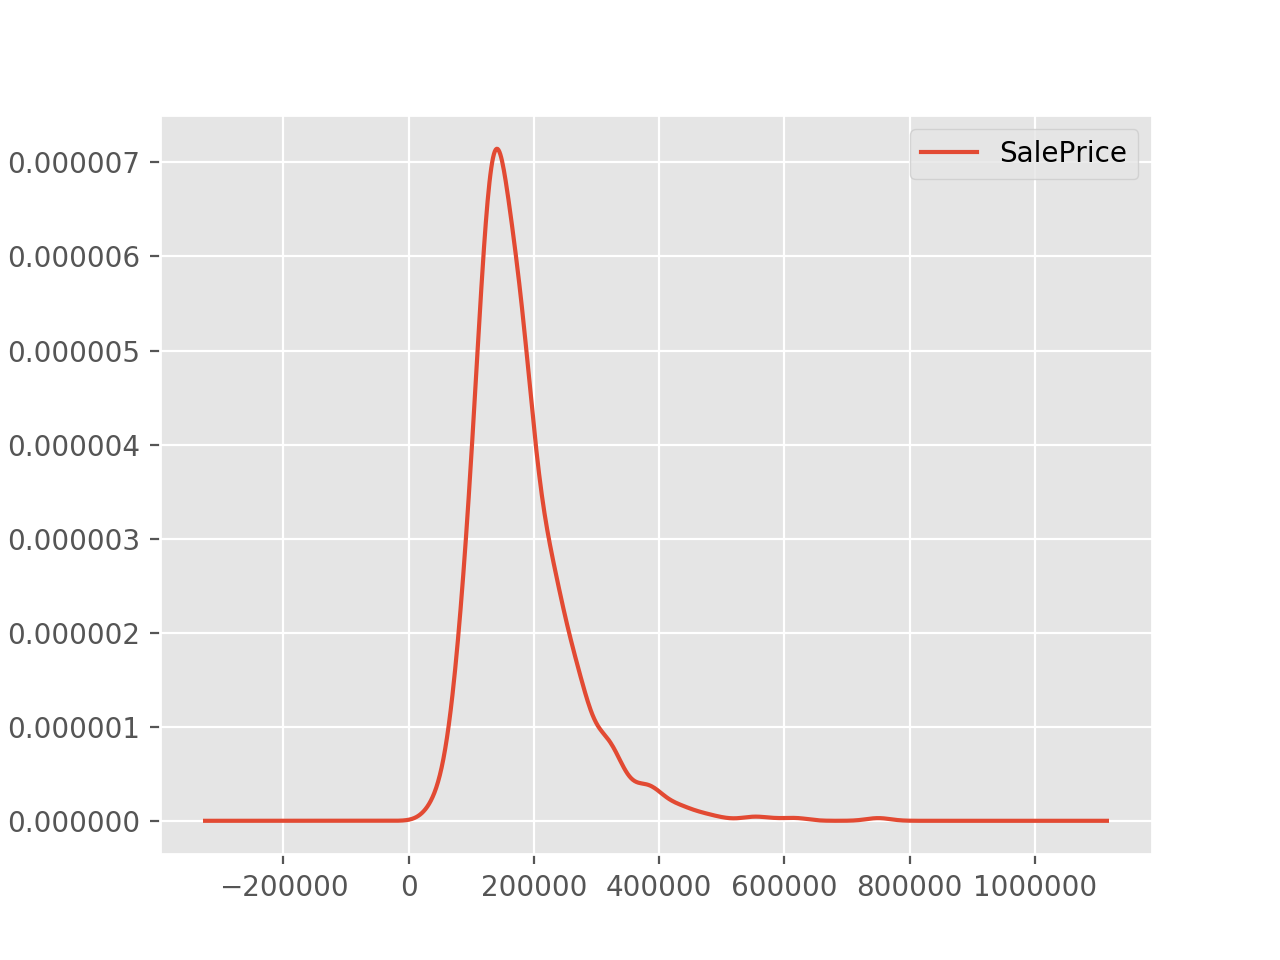

In [28]:
# Create a plot that shows the SalesPrice Distribution
df[['SalePrice']].plot(kind='kde')

<IPython.core.display.Javascript object>


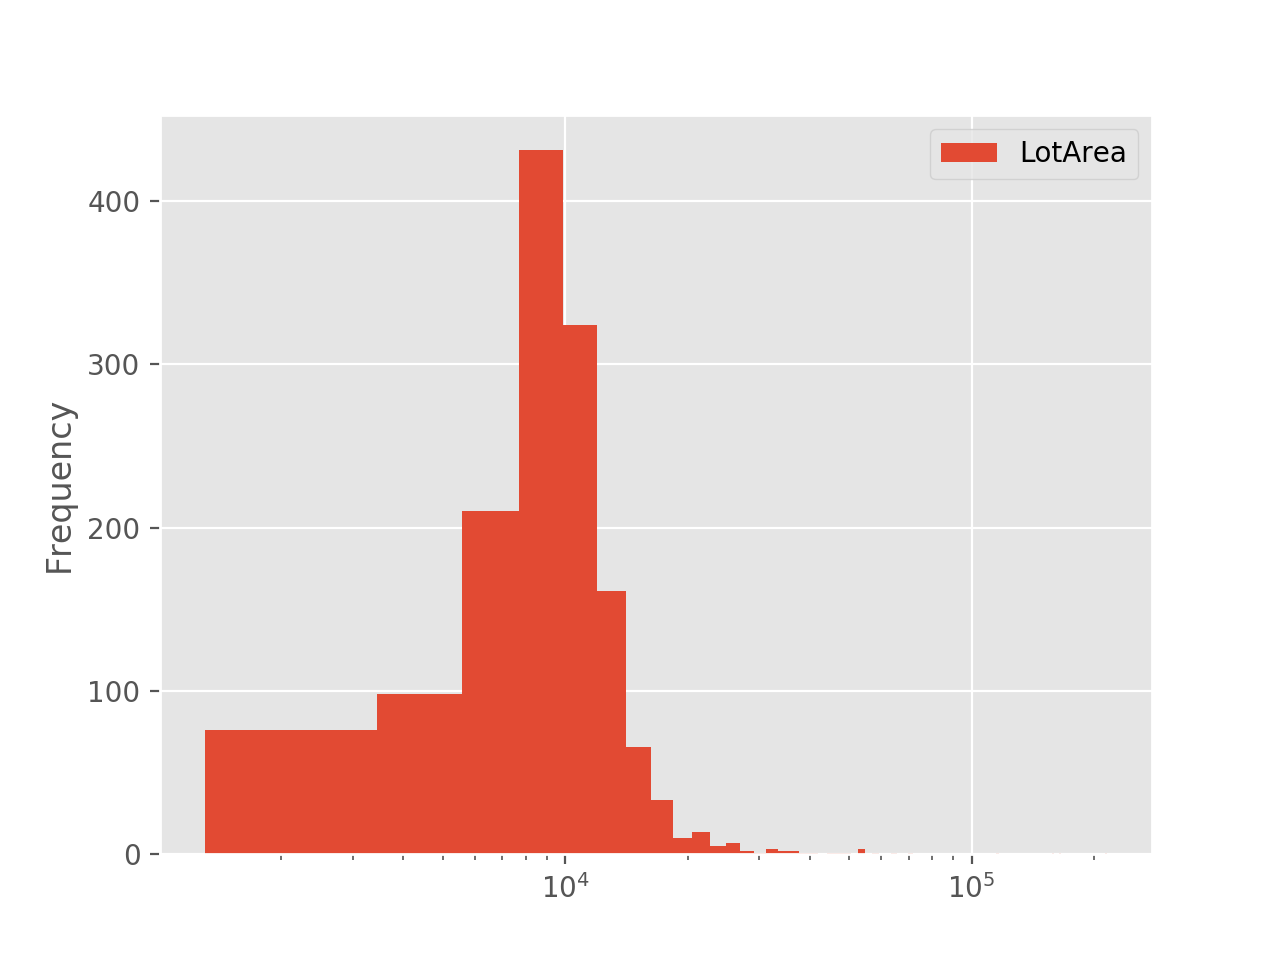

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [37]:
# Create a plot that shows the LotArea Distribution
df[['LotArea']].plot(kind='hist', bins=100, logx=True)
df['LotArea'].describe()

<IPython.core.display.Javascript object>


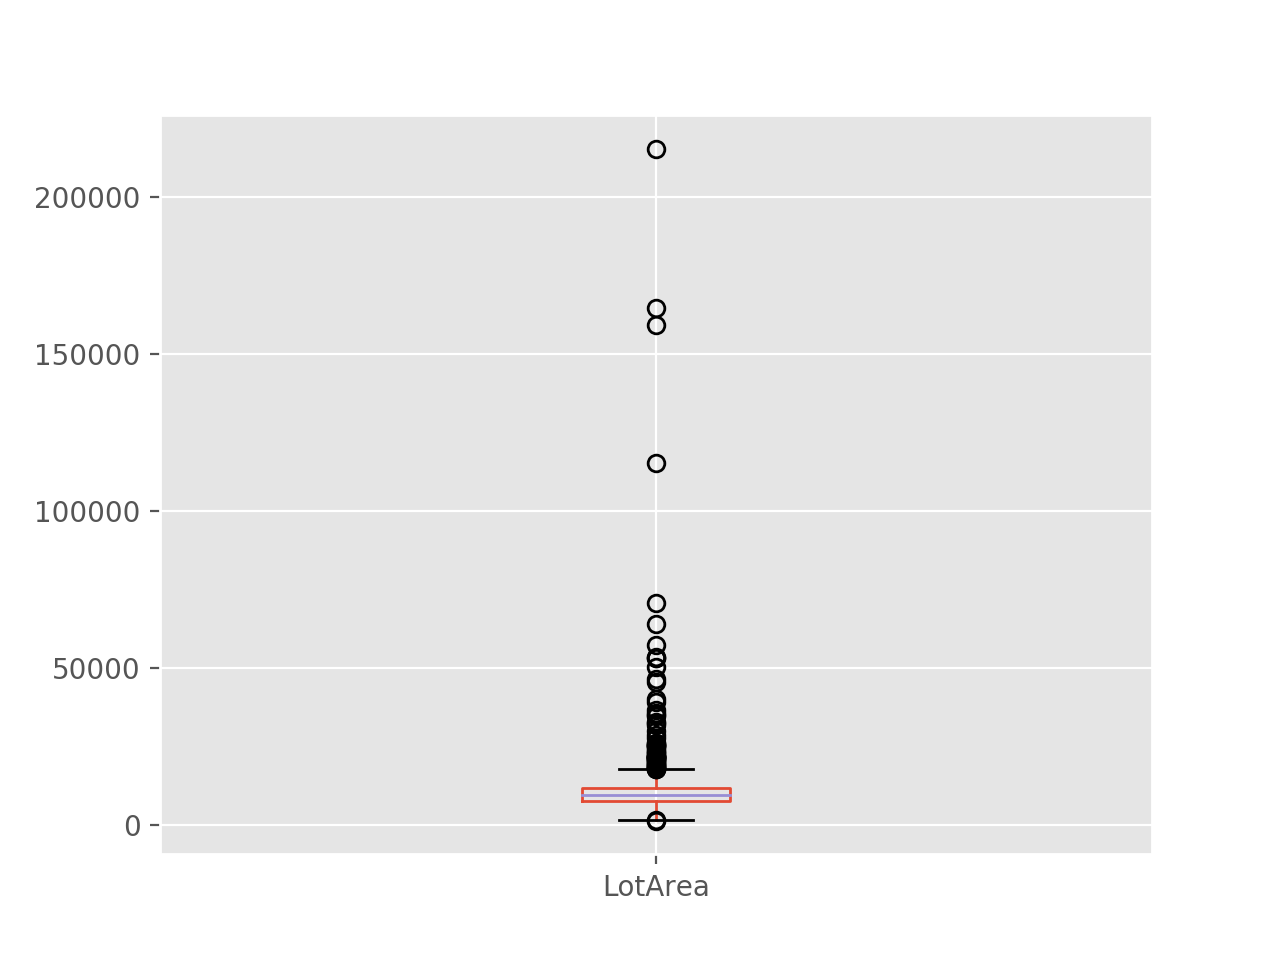

In [40]:
df[['LotArea']].plot(kind='box')

In [ ]:
# Create a plot that shows the Distribution of the overall house condition
data['HouseQual']

<IPython.core.display.Javascript object>


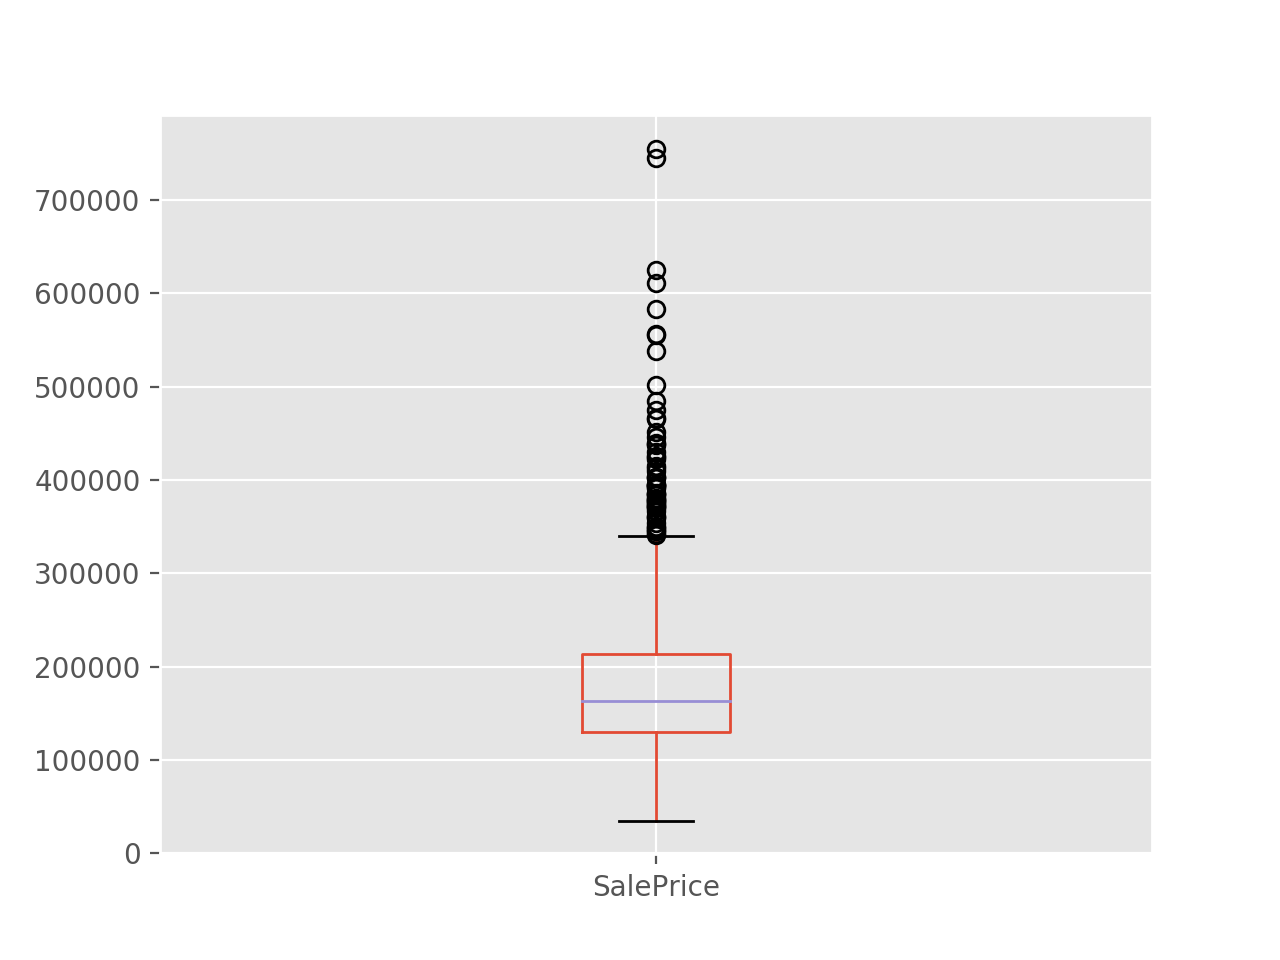

In [44]:
# Create a Box Plot for SalePrice
df[['SalePrice']].plot(kind='box')

           SalePrice
count    1460.000000
mean   180921.195890
std     79442.502883
min     34900.000000
25%    129975.000000
50%    163000.000000
75%    214000.000000
max    755000.000000
Interquartile range is 84025.0
lower limit: 3937.5
upper limit: 340037.5


<IPython.core.display.Javascript object>


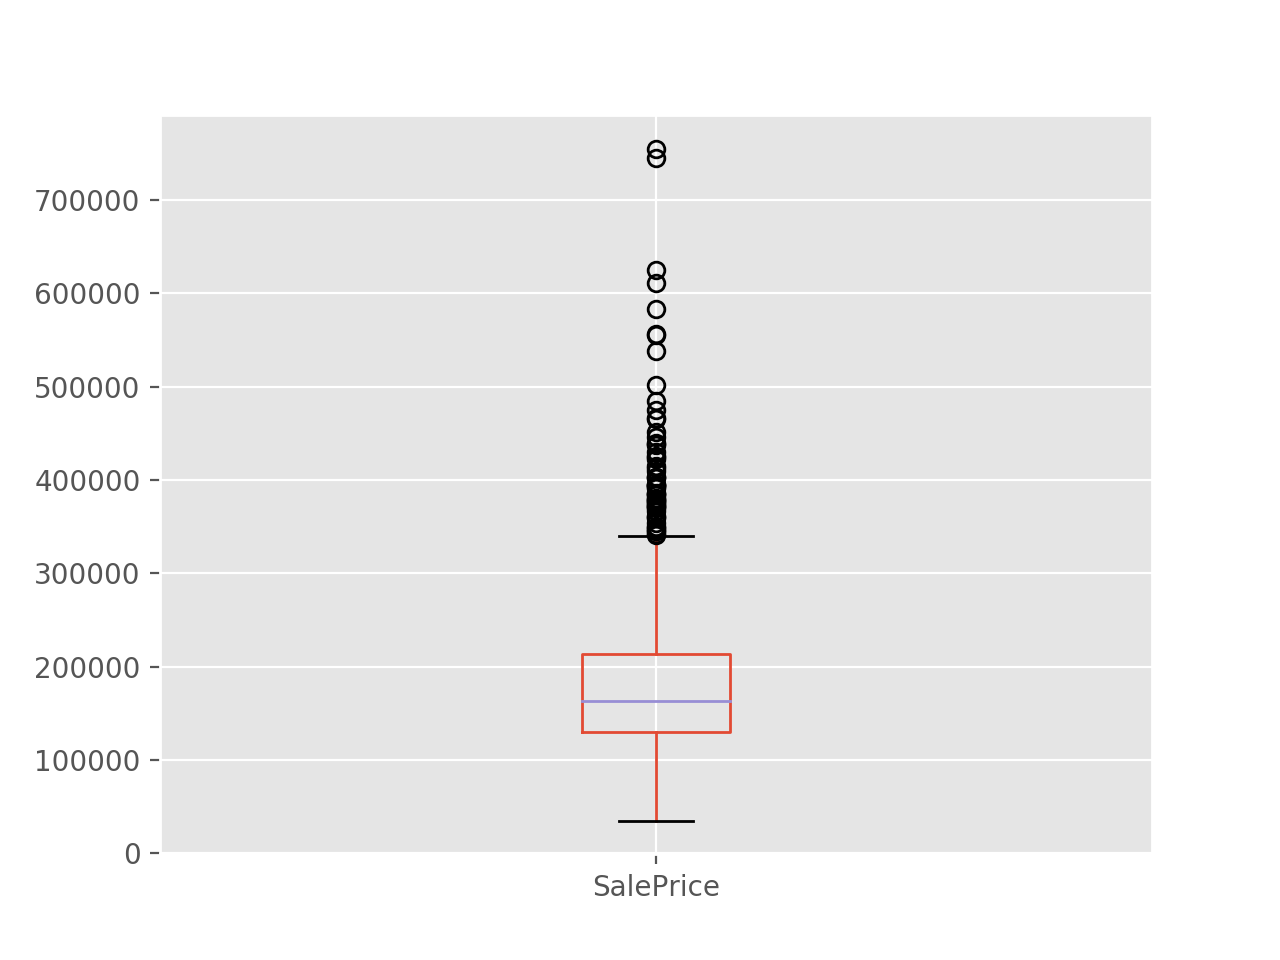

<IPython.core.display.Javascript object>


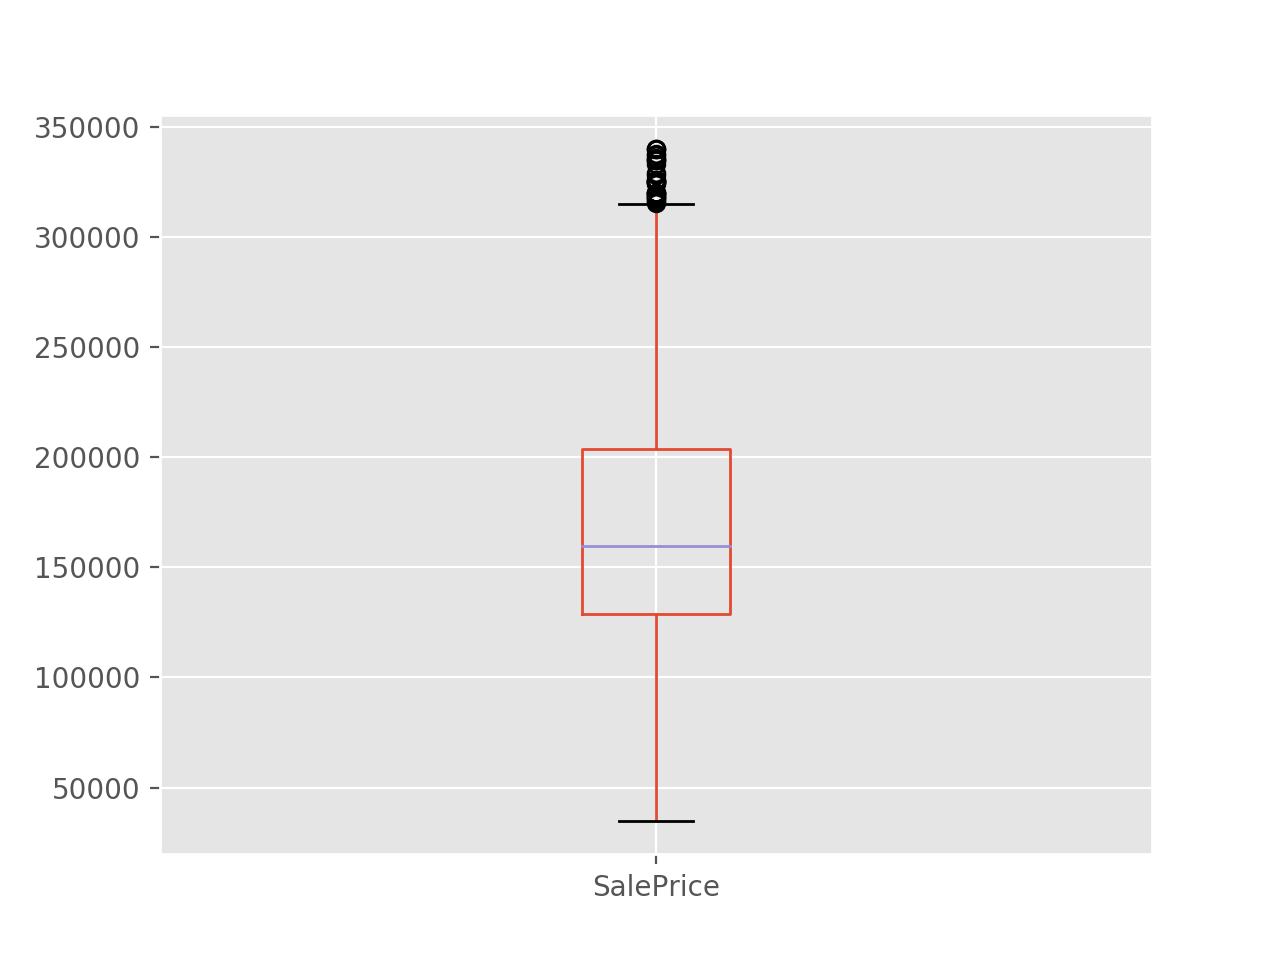

In [80]:
print(df[['SalePrice']].describe())
q3 = float(df[['SalePrice']].quantile(.75))
q1 = float(df[['SalePrice']].quantile(.25))
iq = q3 - q1
print(f'Interquartile range is {iq}')
lower_limit = q1 - 1.5*iq
upper_limit = q3 + 1.5*iq
print(f'lower limit: {lower_limit}\nupper limit: {upper_limit}')
df[['SalePrice']].loc[lower_limit < df.SalePrice].plot(kind='box')
df[['SalePrice']].loc[upper_limit > df.SalePrice].plot(kind='box')

<IPython.core.display.Javascript object>


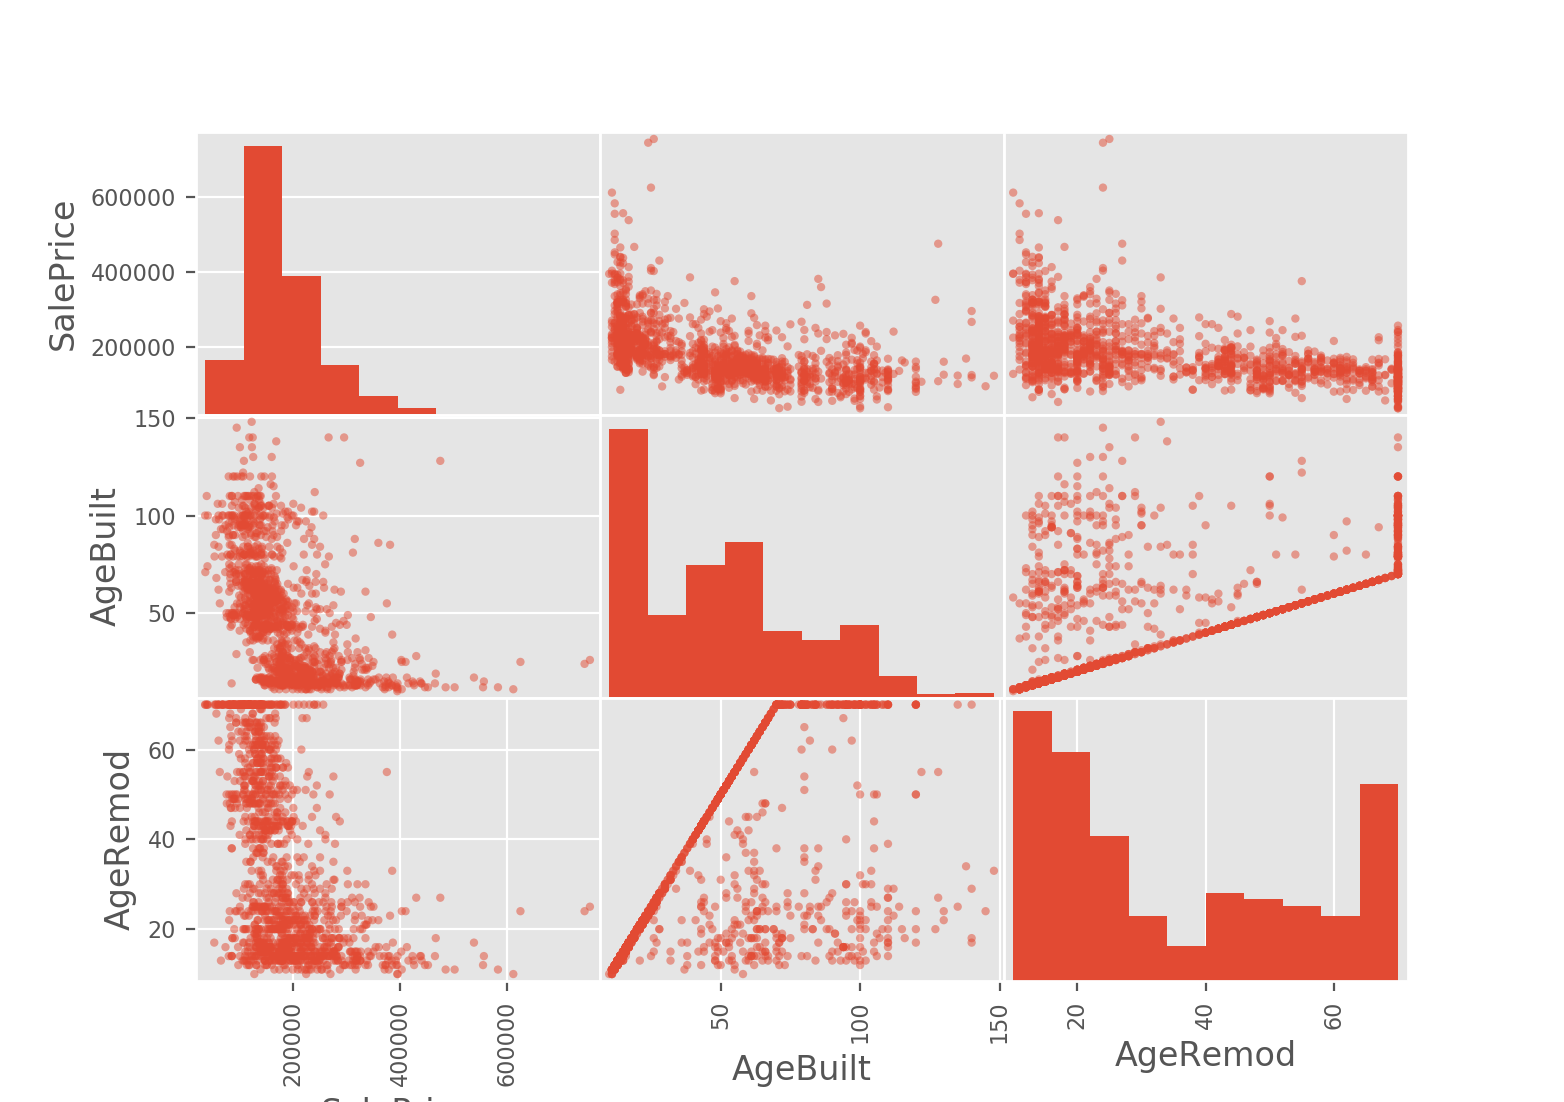

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28fd6978>,
      dtype=object)

In [87]:
# Perform an Exploration of home values by age
# df.info()
df['AgeBuilt'] = df['YearBuilt'].map(lambda x: 2020 - x)
df['AgeRemod'] = df['YearRemodAdd'].map(lambda x: 2020 - x)

pd.plotting.scatter_matrix(df[['SalePrice', 'AgeBuilt', 'AgeRemod']])

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!